In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import csv
from collections import Counter

In [2]:
vad_1 = pd.read_csv(r'C:\Users\surface pro4\Downloads\AIB\A1\visitationdataPART1.csv',parse_dates=['visitdate'])
vad_2 = pd.read_csv(r'C:\Users\surface pro4\Downloads\AIB\A1\visitationdataPART2.csv',parse_dates=['visitdate'])

In [3]:
# group members by TimeofVisit
def visit_time(tv):
    if tv >= datetime.time(6,0) and tv <= datetime.time(11,59):
        return 'morning'
    elif tv >= datetime.time(12,0) and tv <= datetime.time(17,59):
        return 'afternoon'
    elif tv >= datetime.time(18,0) and tv <= datetime.time(20,59):
        return 'evening'
    elif tv>= datetime.time(21,0) and tv <= datetime.time(23,59):
        return 'night'
    elif tv>= datetime.time(0,0) and tv <= datetime.time(5,59):
        return 'latenight'

In [4]:
# merge visitationdataPART1 and visitationdataPART1 into vad_merge
vad_merge = pd.concat([vad_1, vad_2])

# set index of vad_merge as CustomerID
vad_merge = vad_merge.set_index('CustomerID')

# change format of TimeofVisit into Year-Month-Day format
vad_merge['TimeofVisit'] = [datetime.time(int(dt.split(':')[0]),int(dt.split(':')[1])) for dt in vad_merge['TimeofVisit']]

# group TimeofVisit
vad_merge['GroupofVisitTime'] = [visit_time(tv) for tv in vad_merge['TimeofVisit']]    

# get dummy variables for GroupofVisitTime
vad_merge = pd.get_dummies(vad_merge, columns=['GroupofVisitTime'])

# replace True by 1 and False by 0 
vad_merge['is_peak'] = [1 if x else 0 for x in vad_merge['peakvisits']]

# generate visitactiondata 
# vad_merge.to_csv(r'C:\Users\surface pro4\Downloads\AIB\A1\visitactiondata.csv')

In [5]:
# show the processed data frame
vad_merge.head(10)

,visitdate,TimeofVisit,peakvisits,GroupofVisitTime_afternoon,GroupofVisitTime_evening,GroupofVisitTime_latenight,GroupofVisitTime_morning,GroupofVisitTime_night,is_peak
CustomerID,,,,,,,,,
126444,2009-05-01,05:45:00,False,0,0,1,0,0,0
456610,2009-05-01,05:45:00,False,0,0,1,0,0,0
293763,2009-05-01,06:00:00,False,0,0,0,1,0,0
151253,2009-05-01,06:15:00,False,0,0,0,1,0,0
476569,2009-05-01,06:15:00,False,0,0,0,1,0,0
360862,2009-05-01,06:15:00,False,0,0,0,1,0,0
562,2009-05-01,06:45:00,False,0,0,0,1,0,0
528681,2009-05-01,06:45:00,False,0,0,0,1,0,0
639387,2009-05-01,06:45:00,False,0,0,0,1,0,0


<AxesSubplot:xlabel='TimeofVisit'>

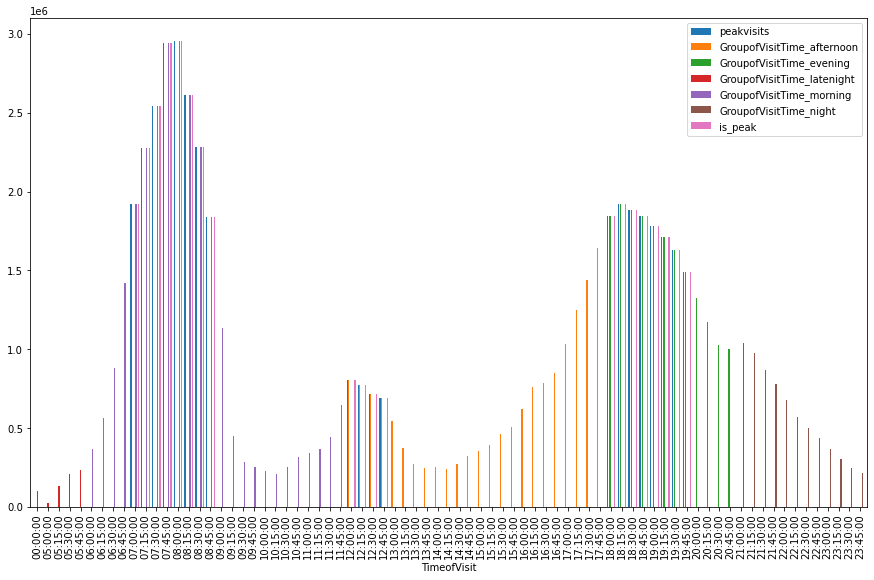

In [6]:
vad_merge.groupby('TimeofVisit').sum('is_peak').plot(kind='bar',figsize=(15,9), width=0.80)

In [7]:
# visit frequency for each CustomerID 
customer_visit = vad_merge.groupby(by='CustomerID').sum()[['GroupofVisitTime_morning','GroupofVisitTime_afternoon','GroupofVisitTime_evening','GroupofVisitTime_night','GroupofVisitTime_latenight']]

# earliest visit date 
customer_visit['VisitDate_earliest'] = vad_merge.groupby(by='CustomerID').min()[['visitdate']]

# latest visit date 
customer_visit['VisitDate_latest'] = vad_merge.groupby(by='CustomerID').max()[['visitdate']]

# sum of visit frequency
customer_visit['SumofVisit'] =vad_merge.groupby(by='CustomerID').count()[['visitdate']]

,GroupofVisitTime_morning,GroupofVisitTime_afternoon,GroupofVisitTime_evening,GroupofVisitTime_night,GroupofVisitTime_latenight,VisitDate_earliest,VisitDate_latest,SumofVisit
CustomerID,,,,,,,,
1,5.0,9.0,4.0,2.0,0.0,2011-12-01,2011-12-27,20
2,29.0,15.0,25.0,5.0,0.0,2018-06-01,2019-01-08,74
3,62.0,35.0,58.0,9.0,1.0,2018-03-03,2018-10-26,165
4,20.0,14.0,12.0,6.0,0.0,2015-10-02,2015-12-28,52
5,31.0,18.0,39.0,4.0,1.0,2015-05-03,2015-12-27,93
6,21.0,5.0,5.0,8.0,0.0,2017-03-04,2017-05-28,39
7,46.0,21.0,12.0,19.0,2.0,2010-08-02,2010-12-26,100
8,33.0,20.0,41.0,5.0,1.0,2017-08-01,2017-12-28,100
9,19.0,13.0,19.0,6.0,0.0,2014-11-01,2015-01-26,57


In [ ]:
# visit frequency for each CustomerID 
customer_visit = vad_merge.groupby(by='CustomerID').sum()[['GroupofVisitTime_morning','GroupofVisitTime_afternoon','GroupofVisitTime_evening','GroupofVisitTime_night','GroupofVisitTime_latenight']

# earliest visit date 
customer_visit['VisitDate_earliest'] = vad_merge.groupby(by='CustomerID').min()[['visitdate']]

# latest visit date 
customer_visit['VisitDate_latest'] = vad_merge.groupby(by='CustomerID').max()[['visitdate']]

# sum of visit frequency
customer_visit['SumofVisit'] =vad_merge.groupby(by='CustomerID').count()[['visitdate']]

# calculate SumofVisit
earliest_list = customer_visit['VisitDate_earliest']
latest_list = customer_visit['VisitDate_latest']
customer_visit['DaysofVisit'] = [((latest-earliest)/np.timedelta64(1, 'D')) for earliest, latest in zip(earliest_list,latest_list)]

In [9]:
# calculate SumofVisit
earliest_list = customer_visit['VisitDate_earliest']
latest_list = customer_visit['VisitDate_latest']
customer_visit['DaysofVisit'] = [((latest-earliest)/np.timedelta64(1, 'D')) for earliest, latest in zip(earliest_list,latest_list)]

In [12]:
# calculate customer visit rate
customer_visit['VisitRate'] = customer_visit['SumofVisit'] / customer_visit['DaysofVisit']

# rank customer visit rate by ActiveDgree
customer_visit['ActiveDgree'] = [('high' if rate > 0.75 else 'medium' if rate > 0.5 and rate <=0.75 else 'low' if rate > 0.25 and rate <=0.50  else 'nonactive') for rate in customer_visit['VisitRate']]

In [13]:
customer_visit.head(10)

,GroupofVisitTime_morning,GroupofVisitTime_afternoon,GroupofVisitTime_evening,GroupofVisitTime_night,GroupofVisitTime_latenight,VisitDate_earliest,VisitDate_latest,SumofVisit,DaysofVisit,VisitRate,ActiveDgree
CustomerID,,,,,,,,,,,
1,5.0,9.0,4.0,2.0,0.0,2011-12-01,2011-12-27,20,26.0,0.769231,high
2,29.0,15.0,25.0,5.0,0.0,2018-06-01,2019-01-08,74,221.0,0.334842,low
3,62.0,35.0,58.0,9.0,1.0,2018-03-03,2018-10-26,165,237.0,0.696203,medium
4,20.0,14.0,12.0,6.0,0.0,2015-10-02,2015-12-28,52,87.0,0.597701,medium
5,31.0,18.0,39.0,4.0,1.0,2015-05-03,2015-12-27,93,238.0,0.390756,low
6,21.0,5.0,5.0,8.0,0.0,2017-03-04,2017-05-28,39,85.0,0.458824,low
7,46.0,21.0,12.0,19.0,2.0,2010-08-02,2010-12-26,100,146.0,0.684932,medium
8,33.0,20.0,41.0,5.0,1.0,2017-08-01,2017-12-28,100,149.0,0.671141,medium
9,19.0,13.0,19.0,6.0,0.0,2014-11-01,2015-01-26,57,86.0,0.662791,medium


<AxesSubplot:xlabel='ActiveDgree'>

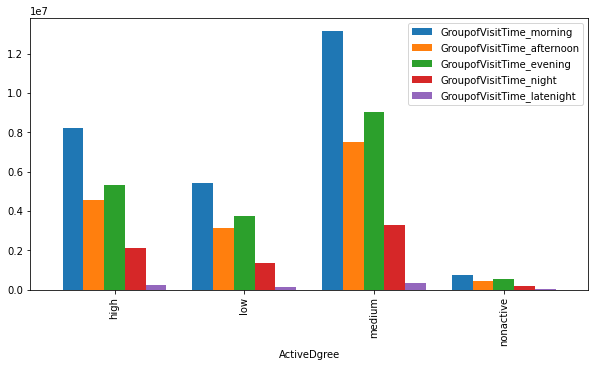

In [29]:
customer_visit.groupby(by='ActiveDgree').sum()[['GroupofVisitTime_morning','GroupofVisitTime_afternoon','GroupofVisitTime_evening','GroupofVisitTime_night','GroupofVisitTime_latenight']].plot(kind='bar',figsize=(10,5), width=0.80)

In [14]:
# classify customers by age 
age_group = {(10,17):'age_group_10_17', (18,25):'age_group_18_25',(26,33):'age_group_26_33', (34,41):'age_group_34_41', (42,49):'age_group_42_49', (50,57):'age_group_50_57', (58,65):'age_group_58_65', (66,100):'age_group_66_100'}


def age_group(age):
    if age >=10 and age <=17:
        return 'age_group_10_17'
    elif age >=18 and age <=25:
        return 'age_group_18_25'
    elif age >=26 and age <=33:
        return 'age_group_26_33'
    elif age >=34 and age <=41:
        return 'age_group_34_41'
    elif age >=42 and age <=49:
        return 'age_group_42_49'
    elif age >=50 and age <=57:
        return 'age_group_50_57'
    elif age >=58 and age <=65:
        return 'age_group_58_65'
    elif age >=66 and age <=100:
        return 'age_group_66_100'

In [15]:
# import subscriptionsdataFINAL.csv
id_df = pd.read_csv(r'C:\Users\surface pro4\Downloads\AIB\A1\subscriptionsdataFINAL.csv',infer_datetime_format=True, parse_dates=True, na_values='#N/A', index_col=['CustomerID'])

# loss customers
id_df['is_loss'] = [(0 if str(date) == '#N/A' else 1) for date in id_df['End Date']]

# age of customers
id_df['age'] = [(2019-year) for year in id_df['BirthYear']]

# age groups of customers
id_df['age_group'] = [age_group(age) for age in id_df['age']]

# drop End Date and Join Date variables
id_df = id_df.drop(columns=['End Date', 'Join Date'])

In [16]:
# show the processed data frame
id_df.head(10)

,Club,Affluence,Gender,Subscription Type,BirthYear,is_loss,age,age_group
CustomerID,,,,,,,,
1,Enfield,C1,Male,Standard,1992,1,27,age_group_26_33
2,Greenwich,A,Female,Standard,1972,1,47,age_group_42_49
3,Islington,B,Female,Standard,1985,1,34,age_group_34_41
4,Hounslow,C1,Female,Standard,1972,1,47,age_group_42_49
5,Barnet,C2,Male,Standard,1982,1,37,age_group_34_41
6,Harrow,C1,Male,Standard,1982,1,37,age_group_34_41
7,Greenwich,B,Female,Standard,1984,1,35,age_group_34_41
8,Brent,C1,Male,Standard,1975,1,44,age_group_42_49
9,Harrow,A,Female,Flexible,1973,1,46,age_group_42_49


In [35]:
df = pd.concat([id_df, customer_visit],axis=1)
df.head(10)

,Club,Affluence,Gender,Subscription Type,BirthYear,is_loss,age,age_group,GroupofVisitTime_morning,GroupofVisitTime_afternoon,GroupofVisitTime_evening,GroupofVisitTime_night,GroupofVisitTime_latenight,VisitDate_earliest,VisitDate_latest,SumofVisit,DaysofVisit,VisitRate,ActiveDgree
CustomerID,,,,,,,,,,,,,,,,,,,
1,Enfield,C1,Male,Standard,1992,1,27,age_group_26_33,5.0,9.0,4.0,2.0,0.0,2011-12-01,2011-12-27,20.0,26.0,0.769231,high
2,Greenwich,A,Female,Standard,1972,1,47,age_group_42_49,29.0,15.0,25.0,5.0,0.0,2018-06-01,2019-01-08,74.0,221.0,0.334842,low
3,Islington,B,Female,Standard,1985,1,34,age_group_34_41,62.0,35.0,58.0,9.0,1.0,2018-03-03,2018-10-26,165.0,237.0,0.696203,medium
4,Hounslow,C1,Female,Standard,1972,1,47,age_group_42_49,20.0,14.0,12.0,6.0,0.0,2015-10-02,2015-12-28,52.0,87.0,0.597701,medium
5,Barnet,C2,Male,Standard,1982,1,37,age_group_34_41,31.0,18.0,39.0,4.0,1.0,2015-05-03,2015-12-27,93.0,238.0,0.390756,low
6,Harrow,C1,Male,Standard,1982,1,37,age_group_34_41,21.0,5.0,5.0,8.0,0.0,2017-03-04,2017-05-28,39.0,85.0,0.458824,low
7,Greenwich,B,Female,Standard,1984,1,35,age_group_34_41,46.0,21.0,12.0,19.0,2.0,2010-08-02,2010-12-26,100.0,146.0,0.684932,medium
8,Brent,C1,Male,Standard,1975,1,44,age_group_42_49,33.0,20.0,41.0,5.0,1.0,2017-08-01,2017-12-28,100.0,149.0,0.671141,medium
9,Harrow,A,Female,Flexible,1973,1,46,age_group_42_49,19.0,13.0,19.0,6.0,0.0,2014-11-01,2015-01-26,57.0,86.0,0.662791,medium


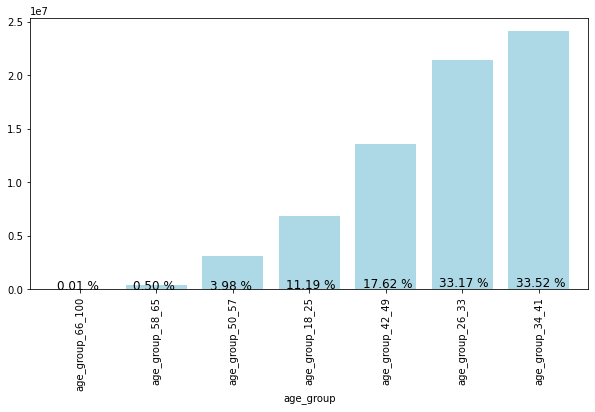

In [63]:
# percentage of each age group 
freq = Counter(df['age_group'])
df.groupby('age_group').sum()['SumofVisit'].sort_values().plot(kind='bar', color= 'lightblue', figsize=(10,5), width=0.80)
for i, (key, val) in enumerate(sorted(freq.items(),key=lambda x: x[1])):
  plt.text(i-0.3,freq[key]+100, '%.2f'%(freq[key]*100/df.shape[0])+ ' %', fontsize=12)

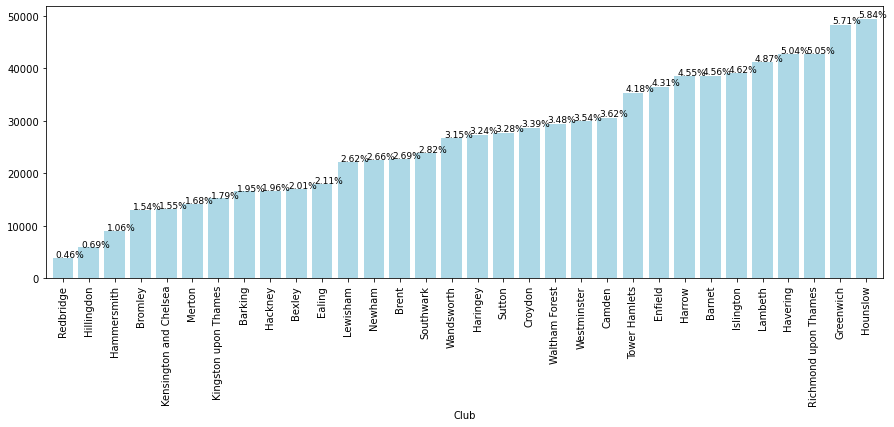

In [61]:
# visit rate for each club

freq = Counter(df['Club'])
df.groupby('Club').count()['SumofVisit'].sort_values().plot(kind='bar', color= 'lightblue',figsize=(15,5), width=0.80);
for i, (key, val) in enumerate(sorted(freq.items(),key=lambda x: x[1])):
  plt.text(i-0.3,freq[key]+100, '%.2f'%(freq[key]*100/df.shape[0])+ '%', fontsize=9)

<AxesSubplot:xlabel='Gender'>

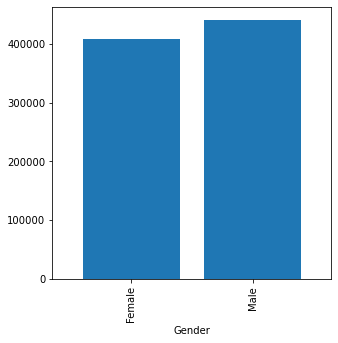

In [27]:
# gender visulisation
id_df.groupby('Gender').count()['Affluence'].plot(kind='bar',figsize=(5,5), width=0.80)

In [ ]:
with plt.style.context(('seaborn', 'ggplot')):
    frequency = Counter(subscriptions['Club'])
    id_df.groupby('Club').count()['NoOfVisits'].sort_values().plot(kind='bar', figsize=(20,5), width=0.80);
    for i, (key, val) in enumerate(sorted(freq.items(),key=lambda x: x[1])):
        plt.text(i-0.3,freq[key]+100, '%.2f'%(freq[key]*100/subscriptions.shape[0])+ '%', fontsize=9)

In [25]:
# import visitationdataPART1.csv and visitationdataPART2.csv
vad_1 = pd.read_csv(r'C:\Users\surface pro4\Downloads\AIB\A1\visitationdataPART1.csv')
vad_2 = pd.read_csv(r'C:\Users\surface pro4\Downloads\AIB\A1\visitationdataPART2.csv')

# merge visitationdataPART1.csv and visitationdataPART2.csv 
vad_merge = pd.concat([vad_1, vad_2])
    
# merge columns 
vad_merge['timestamp'] = vad_merge['visitdate']+' '+vad_merge['TimeofVisit']
vad_merge['timestamp'] = pd.to_datetime(vad_merge['timestamp'])
vad_merge['is_peak'] = [1 if x else 0 for x in vad_merge['peakvisits']]

vad_merge = vad_merge.drop(columns=['peakvisits', 'visitdate', 'TimeofVisit'])
    
# vad_merge.to_csv(r'C:\Users\surface pro4\Downloads\AIB\A1\visitactiondata.csv')

In [10]:
vad_merge.head(10)

,CustomerID,timestamp,is_peak
0,126444,2009-05-01 05:45:00,0
1,456610,2009-05-01 05:45:00,0
2,293763,2009-05-01 06:00:00,0
3,151253,2009-05-01 06:15:00,0
4,476569,2009-05-01 06:15:00,0
5,360862,2009-05-01 06:15:00,0
6,562,2009-05-01 06:45:00,0
7,528681,2009-05-01 06:45:00,0
8,639387,2009-05-01 06:45:00,0
9,172790,2009-05-01 06:45:00,0


In [16]:
df = (vad_merge.set_index('timestamp').groupby(['CustomerID']).sum('is_peak'))
df

,is_peak
CustomerID,
1,9
2,41
3,110
4,32
5,63
...,...
850029,25
850030,15
850031,57


In [18]:
frequency = (vad_merge.set_index('CustomerID').groupby(['timestamp']).sum('is_peak'= 1))
frequency

,is_peak
timestamp,
2009-05-01 00:00:00,0
2009-05-01 05:45:00,0
2009-05-01 06:00:00,0
2009-05-01 06:15:00,0
2009-05-01 06:45:00,0
...,...
2019-01-27 22:45:00,0
2019-01-27 23:00:00,0
2019-01-27 23:15:00,0
